#  Lab: doğrusal regresyon kullanarak ülkelerde VKI'DEN yaşam beklentisini tahmin etme


Bu çalışmada, doğumda ortalama yaşam beklentisi ve dünya çapında erkekler için ortalama VKI verileri ile çalışacaksınız. Veriler [Gapminder] ' dan geliyor(http://www.gapminder.org/).

Veri dosyası "yasam_beklentisi.csv" dosyasından bulunabilir. Veri dosyası aşağıdaki verileri içeren üç sütun içerir:

*  Ulke * * - kişinin doğduğu ülke.  
*  Yasam_Beklentisi * * - o ülkede bir kişi için doğumda ortalama yaşam beklentisi.
* VKI * * – o ülkedeki erkeklerin ortalama vücut kitle indeksi.

### Aşağıdaki aşamaları tamamlayacağız:

**1. Verilerin yüklenmesi**

**2. Doğrusal bir regresyon modelinin kurulması**

**3. Model kullanılarak tahmin yürütülmesi**

# 1. Verileri yükleyelim ve bir grafik çizelim
* Veriler "yasam_beklentisi.csv" dosyasında pandas kütüphanesinin [`read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) komutunu kullanarak verileri bir matrise (dataframe) alalım.
* Matrisi  `vucut_yas_verisi` değişkenine atayalım.


In [156]:
import numpy as np
import pandas as pd

In [157]:
# Veriyi pandas ile okuyalım

vucut_yas_verisi = pd.read_csv('yasam_beklentisi.csv')

# veriyi yazdıralım
vucut_yas_verisi

,Ulke,Yasam_Beklentisi,VKI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083
5,Armenia,72.3,25.35542
6,Australia,81.6,27.56373
7,Austria,80.4,26.46741
8,Azerbaijan,69.2,25.65117
9,Bahamas,72.2,27.24594


Bazı yardımcı fonksiyonlar:
- ilk fonksiyon graifk çizdirmek için.
- One to plot any line, given the slope $w$ and the y-intercept $b$.

In [158]:
import matplotlib.pyplot as plt

x = np.array(vucut_yas_verisi["VKI"])
y = np.array(vucut_yas_verisi["Yasam_Beklentisi"])


#grafik fonksiyonu
def draw_data(x, y):
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color='blue', edgecolor='k')
    plt.xlabel('VKI')
    plt.ylabel('Yasam_Beklentisi')

def display(m, b, color='g'):
    r = np.arange(min(x), max(x), 0.1)
    plt.plot(r, m*r+b, color)

Plotting the data

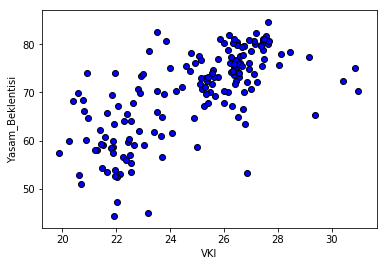

In [159]:
draw_data(x, y)
plt.show()

# 2. Doğrusal bir regresyon modeli oluşturalım
* Doğrusal bir regresyon modeli oluşturup ağırlıkları `bmi_life_model` dizisine (numpy array) aktaralım.
* Veriyi modele sokup analiz edelim.

In [171]:
epochs = 100
learning_rate = 0.001

def linear_regression(x, y):
    # Initialize w and b
    w=1
    b=0
    for epoch in range(epochs):
        for i in range(len(x)):
            tahmin = w*x[i]+b
            fark= y[i] - tahmin
            w += w*fark*learning_rate
            b += fark*learning_rate
    return(w, b)
w, b = linear_regression(x, y)

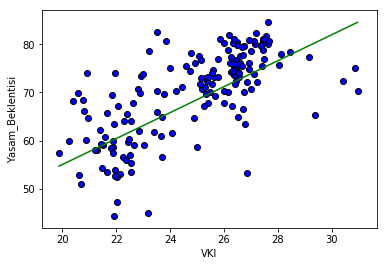

In [172]:
linear_regression(x,y)
draw_data(x, y)
display(w, b)
plt.show()

# 3. Predict using the Model
* Predict using a BMI of 21.07931 and assign it to the variable `laos_life_exp`.

In [173]:
# TODO: Write the prediction function
def predict(w, b, vki):
    return w*vki + b

In [175]:
predict(w, b, 21.07931)

57.98519525597255

In [ ]:
def dogrusal_regresyon(x,y):
    w= np.random.randn(len(x))
    b=0
    
    tahmin
    